# Exercise 4.10 - Part 1




## Question 1:
- Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import data
path = r'/Users/azadehrezaei/Desktop/Career Foundry/Achievement 4/08-2021 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_ords_prods_customers.pkl'))

In [3]:
# checked the max price since I did not remove these rows in the previous steps:
df['prices'].max()

99999.0

In [4]:
# Dropped the rows were the price value is above $100
df.loc[df['prices'] >100, 'prices'] = np.nan

In [5]:
df['prices'].max()

25.0

In [6]:
# viewing all column labels:
pd.set_option("display.max_columns", None)

In [7]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,slowest/busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_freq,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range Product,Regularly busy,Regular Busy,Average Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,-1.0,4,0,both,High-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,Mid-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


## Question 2:

- Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

I removed the customers' first and last names since they can be traced back to a particular individual. 

In [8]:
df = df.drop(columns = ['first_name', 'last_name'])

In [9]:
# checkign to make sure I have all the columns I need:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 object  
 7   order_number            int64   
 8   order_day_of_week       int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  slowest/busiest days    object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spendi

## Question 3:
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).




In [10]:
# create an empty list (region) and use a for-loop to assign a label to each row based on the value in the'state' column:
region = []

for value in df['state']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']): 
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Virginia', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        region.append('South')
    else:
        region.append('West')

In [11]:
# create a new column in df, named 'region' and assign the values in the region list to it:
df['region'] = region

In [12]:
# print the value frequencies in the new column:
df['region'].value_counts(dropna = False)

South        10139985
West          8944813
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [13]:
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [14]:
# copy crosstab to clipboard:
crosstab.to_clipboard()

In [15]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108200,5614536
South,196609,9943376
West,173329,8771484


In [16]:
# I created a new column 'sum' which shows the total number of customers, Low and High Spenders, in each column in the crosstab table:
crosstab['sum'] = crosstab['High Spender'] + crosstab['Low Spender']

In [17]:
crosstab

spending_flag,High Spender,Low Spender,sum
region,,,
Midwest,155975,7441350,7597325
Northeast,108200,5614536,5722736
South,196609,9943376,10139985
West,173329,8771484,8944813


Based on the crosstab results of region and spending_flad columns: the South and West regions have the highest total number of customers, with the south having more than 10 million records (transactions) in this dataframe followed by the West with almost 9 million. 
The South and West regions have the highest number of High Spenders AND Low Spenders. The Northeast has the lowest number of High and Low Spenders. 
This can be considered a trend in the spending habits of Instacart customers, but also partially due to the number of states in each of these regions. 
For example the Northeast region includes 9 states where as the South region includes 17 and the West includes 13 states. 

## Question 4:

- The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [18]:
# creating a new column, 'activity_flag', that taks the values 'High Activity' and 'Low Activity' for above and under 5 orders:
df.loc[df['order_number'] >= 5, 'activity_flag'] = 'High Activity'

In [19]:
df.loc[df['order_number'] < 5, 'activity_flag'] = 'Low Activity'

In [20]:
# counting the frequencies in the new flag column:
df['activity_flag'].value_counts(dropna = False)

High Activity    24414877
Low Activity      7989982
Name: activity_flag, dtype: int64

In [21]:
# exporting the dataframe with customers labeled as 'Low Activity':
df_low_activity = df[df['activity_flag'] == 'Low Activity']

In [22]:
df_low_activity.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,slowest/busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_freq,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,-1.0,4,0,both,High-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Low Activity
9,7147,Classic Baby Creamers Potatoes,83,4,9.0,930730,138,2,0,12,9.0,3,0,both,Mid-range Product,Busiest day,Buesiest Day,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Low Activity
11,8048,Packaged Grape Tomatoes,32,4,11.4,930730,138,2,0,12,9.0,7,0,both,Mid-range Product,Busiest day,Buesiest Day,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Low Activity
12,8048,Packaged Grape Tomatoes,32,4,11.4,1421595,138,3,2,9,9.0,3,1,both,Mid-range Product,Regularly busy,Regular Busy,Average Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Low Activity
13,10473,Half And Half Cream,53,16,7.0,3160996,138,1,5,13,-1.0,6,0,both,Mid-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Low Activity


In [23]:
# export the data frame with low-activity customers:
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_low_activity.pkl'))

In [24]:
# exporting the dataframe with customers labeled as 'High Activity':
df_high_activity = df[df['activity_flag'] == 'High Activity']

In [25]:
df_high_activity.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,slowest/busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_freq,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range Product,Regularly busy,Regular Busy,Average Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,Mid-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
5,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,both,Low-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity


In [26]:
# export the data frame with high-activity customers:
df_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity.pkl'))

- I am keeping my original dataframe that includes all (low and high activity customers) and have exported all the files; Moving forward I'd be conducting all my analysis on the df_high_activity dataframe.

## Question 5:

- The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

For the purpose of customer profiling in this section, I took the following steps:

- crosstab_2: fam_status & department_id
- crosstab_3: fam_status & order_day_of_week
- crosstab_4: gender & order_day_of_week
- crosstab_5: income_flag & order_number
- crosstab_6: prices & income_flag
- crosstab_7: prices & department_id

In [27]:
# investigating family status and the department_id crosstab (in high activity customer set):
crosstab_2 = pd.crosstab(df_high_activity['fam_status'], df_high_activity['department_id'], dropna = False)

In [28]:
crosstab_2.to_clipboard()

In [29]:
crosstab_2

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
fam_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,141623,2267,75587,619577,8936,16965,175452,6262,54174,2213,28189,44554,118637,44414,65423,352593,45168,27775,186821,68073,4509
living with parents and siblings,79512,1460,42543,343702,6284,9659,94324,4190,30606,1347,15627,25251,67169,26224,37784,199894,25796,15595,103918,37543,2971
married,1142589,18771,619188,5070504,73729,138203,1430068,49671,445705,19626,230492,370433,972888,368561,554557,2890356,381394,236039,1537764,547474,40464
single,263890,4668,146012,1193308,19023,33073,336603,11988,103240,4372,54172,83652,226681,85746,130026,677645,86991,56538,358618,129921,9623


Based on the results of the crosstab table above we can see that the most frequent departments based on family status column are:

- divorced/widowed: produce - dairy eggs - snacks
- living with parents and siblings: dairy eggs - snakcs - beverages
- married: produce - dairy eggs - snacks
- single: produce - dairy eggs - snacks

The least frequented department by all groups is 'bulk'. We can use this information to target our digital coupons to the most frequented departments by all family groups. 


In [30]:
# investigating age and the department_id crosstab (in high activity customer set):
crosstab_3 = pd.crosstab(df_high_activity['fam_status'], df_high_activity['order_day_of_week'], dropna = False)

In [31]:
crosstab_3.to_clipboard()

In [32]:
crosstab_3

order_day_of_week,0,1,2,3,4,5,6
fam_status,,,,,,,
divorced/widowed,391092,363655,270869,251315,244202,278043,290036
living with parents and siblings,218563,205356,151998,139091,138704,156904,160783
married,3232442,2989548,2232016,2040564,2032071,2252061,2359774
single,760126,715582,519491,475704,474848,530189,539850


Based on the crosstab table above, ALL family groups shop more on day 0 (Saturdays) and shop the least on day 4 (Wednesdays).

In [33]:
# investigating gender and the order_day_of_week crosstab (in high activity customer set):
crosstab_4 = pd.crosstab(df_high_activity['gender'], df_high_activity['order_day_of_week'], dropna = False)

In [34]:
crosstab_4.to_clipboard()

In [33]:
crosstab_4

order_day_of_week,0,1,2,3,4,5,6
gender,,,,,,,
Female,2274069,2131471,1583306,1441073,1437260,1600977,1659401
Male,2328154,2142670,1591068,1465601,1452565,1616220,1691042


Based on the crosstab table above, both male and female customers shop more on days 0 and 1 (Saturdays and Sundays), with males shopping more than females, and both groups shop the least on day 4 (Wednesdays). 
This information can be used to dedicate more shoppers to instacart on days with higher traffic. 

- create an 'income_flag' column
income under 40,000 is labeled as 'Low Income', between 40,000 and 100,000 is labeled as 'Mid-level Income' and above 100,000 is 'High Income'.

In [35]:
df_high_activity.loc[df_high_activity['income'] < 40000, 'income_flag'] = 'Low Income'

/Users/azadehrezaei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/azadehrezaei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [36]:
df_high_activity.loc[(df_high_activity['income'] >= 40000) & (df_high_activity['income'] < 100000), 'income_flag'] = 'Mid-level Income'

/Users/azadehrezaei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [37]:
df_high_activity.loc[df_high_activity['income'] >= 100000, 'income_flag'] = 'High Income'

/Users/azadehrezaei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [38]:
# Using value frequencies to find the number of transactions in each category:
df_high_activity['income_flag'].value_counts(dropna = False)

Mid-level Income    11949027
High Income         11225998
Low Income           1239852
Name: income_flag, dtype: int64

The frequencies above cannot be considered as the number of customers in each category, but rather the number of transactions. To find the number of customers I need to apply groupby on customers' user_id:

In [39]:
df_income_category = df_high_activity.groupby('income_flag').agg({'user_id':['nunique']})

In [40]:
df_income_category

,user_id
,nunique
income_flag,
High Income,70081
Low Income,12625
Mid-level Income,79925


Interetingly, we have more mid-level income customers followed by high_income and then the low_income customers. 

In [41]:
crosstab_5 = pd.crosstab(df_high_activity['income_flag'], df_high_activity['order_number'], dropna = False)

In [42]:
crosstab_5

order_number,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
income_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High Income,740229,673877,611031,559433,514861,474808,439573,404657,376532,350216,323940,303941,285669,268061,251640,236002,222177,210457,198014,187027,177681,169297,161019,152981,144191,137443,132194,126663,119577,113721,107597,102517,98464,93292,89712,85431,81014,78340,74341,70952,67115,64000,60618,57436,54441,51465,48293,45968,43303,40580,38622,36685,34069,33356,31420,30526,28517,27299,25571,24792,23065,22354,21479,20691,19622,18644,17880,17406,16754,15314,15015,14353,13574,13100,12717,11875,11438,11067,10680,10393,9952,9367,9137,8552,8434,8068,7988,7670,7305,7218,6899,6564,6562,6241,5972
Low Income,92292,81862,73096,65750,59359,53483,49071,45783,41980,37903,35827,32991,30406,29211,27051,25088,23968,22106,21264,19837,19122,18077,16650,16343,15453,14903,13960,13628,12711,12406,11874,11322,10637,10167,9715,9132,8366,7964,7676,7135,7047,6633,6238,6115,5923,5386,5221,4811,4542,4220,3963,3591,3329,3235,2976,2997,2674,2597,2394,2060,2163,1874,1845,1829,1634,1550,1498,1356,1298,1337,1339,1299,1351,1114,1231,1072,1147,1052,1038,980,910,927,777,802,826,662,722,632,598,588,605,582,554,547,592
Mid-level Income,794380,715155,648508,592864,545271,499487,461138,426374,400448,373055,346810,324993,305457,286579,270516,253470,240190,226173,214662,202617,192781,182106,172840,163224,155760,147861,141482,133180,126641,120208,115011,110678,104861,99403,94913,90987,85842,81842,78300,74270,70622,67001,63073,60412,56788,53973,51208,48333,45150,42619,41618,38383,37168,34603,33232,31438,29942,28178,27205,25924,24596,23546,22627,21862,21157,20545,18933,18685,17915,17303,16570,15408,14640,14432,13803,13220,12655,11488,11944,11108,10642,9863,9629,9261,8816,8467,8135,7921,7492,7394,7012,6591,6240,6063,5857


In [42]:
crosstab_5.to_clipboard()

Looks from the crosstab above we can see that the minimum order in all income categories is 5. Just by a quick look we can see that almost all income categories spend more on smaller number of orders with the high and med-level income categories placing orders at about 8 times more than the low income category. 

In [43]:
# investigating the average price and income relationship:
crosstab_6 = pd.crosstab(df_high_activity['prices'].mean(), df_high_activity['income_flag'], dropna = False)

In [44]:
crosstab_6.to_clipboard()

In [45]:
crosstab_6

income_flag,High Income,Low Income,Mid-level Income
row_0,,,
7.790672,11225998,1239852,11949027


Interestingly based on the crosstab table above, people with mid-level income spend the most in Instacart, followed closely by the high-income category. 

In [44]:
# investigating the total price and department_id to see which department sells the most through the platform:
crosstab_7 = pd.crosstab(df_high_activity['prices'].sum(), df_high_activity['department_id'], dropna = False)

In [45]:
crosstab_7.to_clipboard()

In [46]:
crosstab_7

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
row_0,,,,,,,,,,,,,,,,,,,,,
190179397.3,1627614,27166,883330,7227091,107972,197900,2036447,72111,633725,27558,328480,523890,1385375,524945,787790,4120488,539349,335947,2187121,783011,57567


Not very surprisingly, the departments with the highest sell are the same ones that are frequented the most: produce (4), dairy eggs (16), snacks (19). 
At the same time, the department labeled as 'other' (2) sells the least. 

- Creating a pet_flag column for customers w/o pets:
If the order includes and item from department_id 8 (pets), it is flagged 1 under the 'pet_flag' column; and if it does not include an item from department_id 8, then it takes the value 0.

In [47]:
# create a pet_flag column and assigning yes/no to orders that include an item from department_id = 8 (pets
df_high_activity.loc[(df_high_activity['department_id'] == 8), 'pet_flag'] = 1

/Users/azadehrezaei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/azadehrezaei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [48]:
df_high_activity.loc[df_high_activity['department_id'] !=8, 'pet_flag'] = 0

/Users/azadehrezaei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [49]:
df_high_activity['pet_flag'].value_counts(dropna = False)

0.0    24342766
1.0       72111
Name: pet_flag, dtype: int64

The count above on the pet_flag column shows that 72111 transactions where made from department_id 8 (pets)

In [50]:
72111/(24342766+72111)

0.002953568023299892

Only 0.29% of the total number of records belong to pet department. A great number of transactions (99.7%) do not include any purchase of pet products. 

Creating another column labeled 'pet_owner' doesn't rea;;y help in this dataframe since each line shows one item in the transaction, which can be labeled as an item from the pet department or not. 
To find the users that can be considered pet owners, I decided to group the transactions by their user_id and aggregate by the sum value on the pet_flag column (which is the reason I assigned integer values of 0 and 1 to the pet_flag column). 

In [51]:
df_pet = df_high_activity.groupby('user_id').agg({'pet_flag':'sum'})

Next, I am going to run the value_count function in the df_pet sub dataframe. 
Based on the results of this command below, there are 151,786 customers with 0 purchases from the pet department, 3, 680 with only 1 purchase, and so on. 
Below I am using .nunique() to find the total number of unique user_ids. 

In [52]:
# finding the total number of unique user_id values (customers):
n = df_high_activity.user_id.nunique()
n

162631

In [53]:
df_pet['pet_flag'].value_counts(dropna = False)

0.0      151786
1.0        3680
2.0        1787
3.0        1081
4.0         740
          ...  
81.0          1
82.0          1
114.0         1
100.0         1
120.0         1
Name: pet_flag, Length: 136, dtype: int64

In [54]:
(162631 - 151786) / 162631

0.06668470340832929

Based on my calculations above, only about 6.67% of Instacart customers have made at least one purchase from the pet department. 

- I am repeating the same steps to create a baby_flag column here. Orders that were placed from department_id 18 are flagged as 1, for yes and 0, for no!
I will then calculate the number of transactions that were made in this department. 
I am also going to find out the percentage of users who place orders in this department. We do have a column for n_dependants, but that does not necessarily mean that the dependants are babies. 

In [55]:
# create a baby_flag column and assigning yes/no to orders that include an item from department_id = 18 (babies):

df_high_activity.loc[(df_high_activity['department_id'] == 18), 'baby_flag'] = 1

/Users/azadehrezaei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/azadehrezaei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [56]:
df_high_activity.loc[df_high_activity['department_id'] !=18, 'baby_flag'] = 0

/Users/azadehrezaei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [57]:
df_high_activity['baby_flag'].value_counts(dropna = False)

0.0    24078930
1.0      335947
Name: baby_flag, dtype: int64

In [58]:
335947/(335947 + 24078930)

0.013759930062314055

Based on the results of the flag and value_counts above, 13.76% of the transactions have an item from this (babies) department. 

I will next group the transactions by their user_id and aggregate the sum value of the baby_flag column:

In [59]:
df_babies = df_high_activity.groupby('user_id').agg({'baby_flag':'sum'})

In [60]:
df_babies['baby_flag'].value_counts(dropna = False)

0.0      136860
1.0        6831
2.0        3329
3.0        2006
4.0        1559
          ...  
165.0         1
152.0         1
196.0         1
267.0         1
226.0         1
Name: baby_flag, Length: 256, dtype: int64

In [61]:
(162631 - 136860) / 162631

0.15846302365477677

 I already know from the previous part that there are a total of 162631 unique user_ids in this dataframe subset. 
 Based on the above results, 15.85% of out Instacart customers are purchasing products from the babies department.

In [62]:
# crosstab of age and time of the day

crosstab_8 = pd.crosstab(df_high_activity['age'], df_high_activity['order_hour_of_day'], dropna = False)

In [63]:
crosstab_8.to_clipboard()

Looks like most age groups place the most orders between 11 am to 4 pm. 





In [64]:
# crosstab of n_dependants and money spent

crosstab_9 = pd.crosstab(df_high_activity['prices'].sum(), df_high_activity['n_dependants'], dropna = False)
crosstab_9.to_clipboard()

Interestingly, people with 0, 1, 2, and 3 n_dependants have the same number of transactions in the crosstab table above with those with 3 dependants spending sligthly the most followed by 0, 2 and then 1 dependant. 

In [65]:
# Finding the number of customers in each region:

df_region = df_high_activity.groupby('region').agg({'user_id':['nunique']})

In [66]:
df_region

,user_id
,nunique
region,
Midwest,38376
Northeast,28581
South,50984
West,44690


Based on the table above, the most number of customers belong to the South region, follwoed by the West, and the least number of customers live in the Northeast. 
  

In [67]:
# Finding the number of customers in each gender category:

df_gender= df_high_activity.groupby('gender').agg({'user_id':['nunique']})

In [68]:
df_gender

,user_id
,nunique
gender,
Female,80633
Male,81998


In [69]:
# Finding the number of customers in each spending category:

df_spending= df_high_activity.groupby('spending_flag').agg({'user_id':['nunique']})

In [70]:
df_spending

,user_id
,nunique
spending_flag,
High Spender,3700
Low Spender,158931


In [71]:
# Finding the number of customers in each loyalty category:

df_loyalty= df_high_activity.groupby('loyalty_flag').agg({'user_id':['nunique']})

In [72]:
df_loyalty

,user_id
,nunique
loyalty_flag,
Loyal customer,17017
New customer,68750
Regular customer,76864


In [73]:
# Finding the number of pet_owners in each region:

df_pet_region= df_high_activity.groupby(['pet_flag', 'region']).agg({'user_id':['nunique']})

In [74]:
df_pet_region

user_id
                   nunique
pet_flag region           
0.0      Midwest     38373
         Northeast   28581
         South       50978
         West        44684
1.0      Midwest      2570
         Northeast    1879
         South        3354
         West         3042

Based on the table the highest number of petowners live in the South and next in the West! 

In [75]:
# Finding the number of baby_flags in each region:

df_baby_region= df_high_activity.groupby(['baby_flag', 'region']).agg({'user_id':['nunique']})

In [76]:
df_baby_region

user_id
                    nunique
baby_flag region           
0.0       Midwest     38374
          Northeast   28577
          South       50976
          West        44682
1.0       Midwest      6161
          Northeast    4492
          South        8111
          West         7007

In [77]:
# Finding the number of customers per day in each region:

df_day_region= df_high_activity.groupby(['order_day_of_week', 'region']).agg({'user_id':['nunique']})

In [78]:
df_day_region

user_id
                            nunique
order_day_of_week region           
0                 Midwest     24411
                  Northeast   18268
                  South       32553
                  West        28695
1                 Midwest     25562
                  Northeast   19116
                  South       33849
                  West        29860
2                 Midwest     23663
                  Northeast   17613
                  South       31506
                  West        27429
3                 Midwest     22918
                  Northeast   17123
                  South       30432
                  West        26488
4                 Midwest     22378
                  Northeast   16777
                  South       29925
                  West        26121
5                 Midwest     22868
                  Northeast   16891
                  South       30168
                  West        26537
6                 Midwest     21561
                  Northeast   16166
                  South       28698
                  West        25300

In [87]:
# Export data:
df_high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_customers.pkl'))

## Question 6:
Create an appropriate visualization to show the distribution of profiles.

In [79]:
# Creating two sets small/big for the line plots in this section:

np.random.seed(4)
dev = np.random.rand(len(df_high_activity)) <= 0.7

In [80]:
# Creating two subsets for the dataframe with 70 and 30 percent of the data:
big = df_high_activity[dev]
small = df_high_activity[~dev]

- Creating a lineplot for the changes in prices column based on order_day_of_week:

In [81]:
# Reducing the dataframe to the columns I need:

df_1 = small[['order_day_of_week', 'prices']]

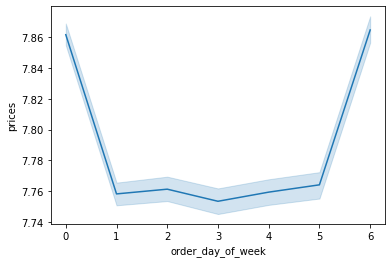

In [92]:
# creating the line plot for the small dataframe:
line_plot = sns.lineplot(data = df_1, x = 'order_day_of_week', y = 'prices')

In [93]:
line_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_day_of_week.png'))

- Creating a lineplot for the changes in prices column based on order_hour_of_day:

In [82]:
# Reducing the dataframe to the columns I need:
df_2 = small[['order_hour_of_day', 'prices']]

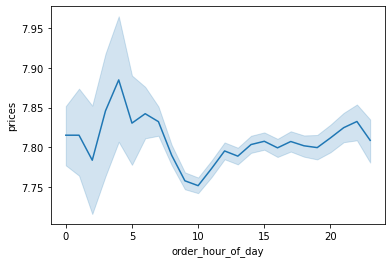

In [95]:
line_plot2 = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [96]:
line_plot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_hour_of_day.png'))

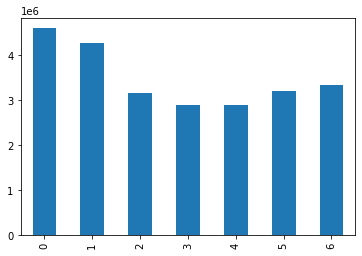

In [97]:
# order day of the week frequency barplot:
barplot = df_high_activity['order_day_of_week'].value_counts().sort_index().plot.bar()

In [98]:
barplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_day_of_week_frequency.png'))

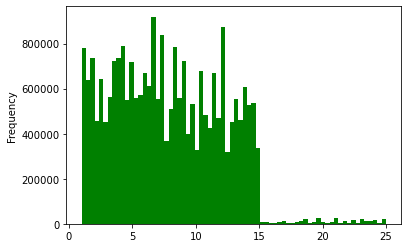

In [100]:
hist = df_high_activity['prices'].plot.hist(bins = 70, color = ['green'])

In [101]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_distribution_hist.png'))

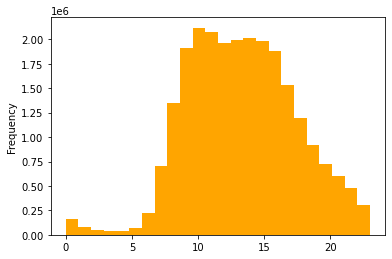

In [102]:
# You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.In a markdown cell beneath your histogram, describe what the histogram demonstrates.
hist_2 = df_high_activity['order_hour_of_day'].plot.hist(bins = 24, color = ['orange'])

In [103]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_histogram.png'))

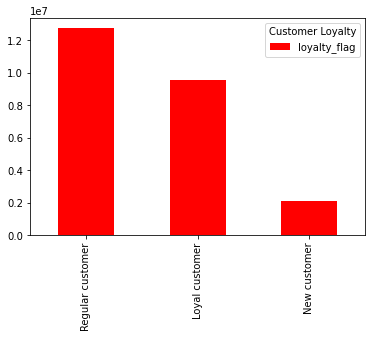

In [110]:
#The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
barplot_2 = df_high_activity['loyalty_flag'].value_counts().plot.bar(color = ['red'])
plt.legend(title='Customer Loyalty')

In [111]:
barplot_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar.png'))

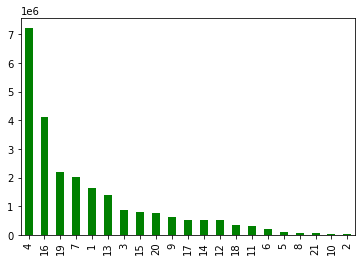

In [116]:
# department_id frequency:

barplot_3 = df_high_activity['department_id'].value_counts().plot.bar(color = ['green'])

In [117]:
barplot_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_id_freq.png'))

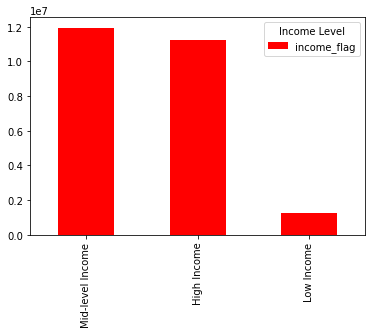

In [108]:
# Income_level bar plot:
barplot_4 = df_high_activity['income_flag'].value_counts().plot.bar(color = ['red'])
plt.legend(title='Income Level')

In [109]:
barplot_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_flag_barplot.png'))

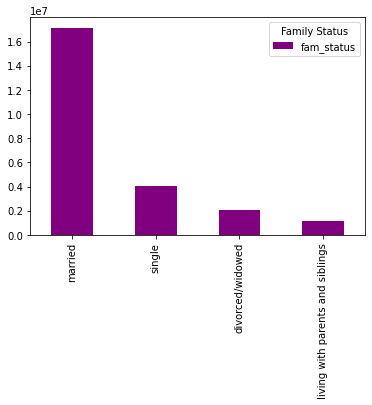

In [123]:
# fam_status bar plot:

barplot_5 = df_high_activity['fam_status'].value_counts().plot.bar(color=['purple'])
plt.legend(title='Family Status')

In [124]:
barplot_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_barplot.png'))

In [83]:
# creating subgroup of user frequency type of items purchased

df_3 = df_high_activity.groupby(['department_id', 'loyalty_flag'])['department_id'].count().unstack('loyalty_flag').fillna(0)

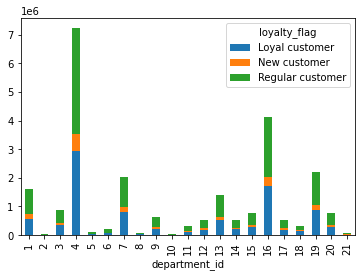

In [131]:
# loyalty_flag and department_id stacked barplot: 
stackedbar_1 = df_3.plot(kind='bar', stacked=True)

In [133]:
stackedbar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_and_departmentid_stackedbar.png'))

In [84]:
# creating subgroup of user region and loyalty_flag of items purchased

df_4 = df_high_activity.groupby(['region', 'loyalty_flag'])['region'].count().unstack('loyalty_flag').fillna(0)

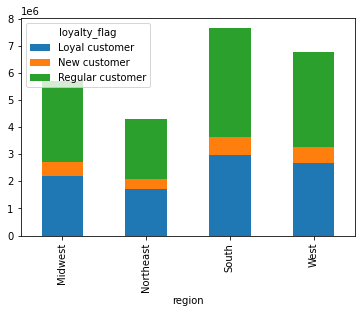

In [132]:
# loyalty_flag and region stacked barplot: 
stackedbar_2 = df_4.plot(kind='bar', stacked=True)

In [134]:
stackedbar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_and_region_stackedbar.png'))

In [85]:
# creating subgroup of user region and income_flag of items purchased

df_5 = df_high_activity.groupby(['region', 'income_flag'])['region'].count().unstack('income_flag').fillna(0)

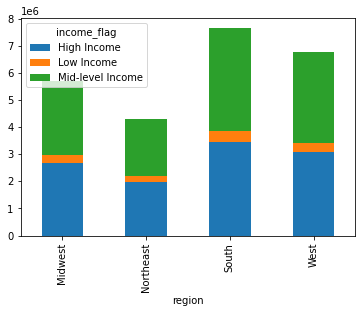

In [87]:
# income_flag and region stacked barplot: 
stackedbar_3 = df_5.plot(kind='bar', stacked=True)

In [107]:
stackedbar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_flag_region_stackedbar.png'))

## Question 7:
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [89]:
# aggregating by prices:

df_high_activity.groupby('user_id').agg({'prices': ['mean', 'min', 'max']})

prices           
             mean  min   max
user_id                     
1        6.697368  1.3  14.0
10       8.275862  1.0  21.1
100      9.250000  4.7  15.0
1000     8.537209  1.2  15.0
10000    8.048023  1.2  24.2
...           ...  ...   ...
99994    8.278641  1.1  14.3
99995    6.570000  1.2  11.4
99996    6.892208  1.1  15.0
99998    9.600000  4.5  21.1
99999    7.257840  1.1  24.2

[162631 rows x 3 columns]

In [90]:
# aggregating by days_prior_order:

df_high_activity.groupby('user_id').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order            
                          mean   min   max
user_id                                   
1                    19.842105   0.0  30.0
10                   23.000000  23.0  23.0
100                  26.000000  26.0  26.0
1000                 14.302326   7.0  30.0
10000                 5.004822   0.0  17.0
...                        ...   ...   ...
99994                16.893204   5.0  30.0
99995                14.000000  14.0  14.0
99996                22.519481  15.0  30.0
99998                 9.000000   9.0   9.0
99999                 7.752613   1.0  24.0

[162631 rows x 3 columns]

In [91]:
# aggregating by fam_status:

df_high_activity.groupby('fam_status').agg({'order_number':['mean','median','min', 'max']})

order_number               
                                         mean median min max
fam_status                                                  
divorced/widowed                    22.119075     16   5  99
living with parents and siblings    22.102311     16   5  99
married                             21.886303     16   5  99
single                              22.088822     16   5  99

In [92]:
# aggregating by baby_flag:

df_high_activity.groupby('baby_flag').agg({'age':['mean','median','min', 'max']})

age               
                mean median min max
baby_flag                          
0.0        49.459228     49  18  81
1.0        49.321881     49  18  81

In [93]:
# aggregating by pet_flag:

df_high_activity.groupby('pet_flag').agg({'age':['mean','median','min', 'max']})

age               
               mean median min max
pet_flag                          
0.0       49.457348     49  18  81
1.0       49.453884     50  18  81

## Question 8:
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

- I included some of teh customer profile compparisons in the previous section, but here are a few more!

In [94]:
# customers frequency, department_id and regions profile:

df_6 = df_high_activity.groupby(['department_id', 'region'])['department_id'].sum().unstack('region').fillna(0)

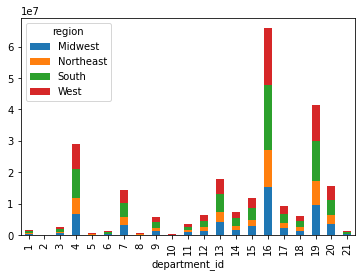

In [95]:
stackbar_4 = df_6.plot(kind='bar', stacked = True)

In [96]:
stackbar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departmentid_region_stackbar.png'))

- Investigating the hsopping habits of different loyalty groups in each region based on the frequency of their orders:

In [101]:
# customers frequency, loyalty_flag and regions profile:

df_7 = df_high_activity.groupby(['loyalty_flag', 'region'])['days_since_prior_order'].mean().unstack('loyalty_flag').fillna(0)

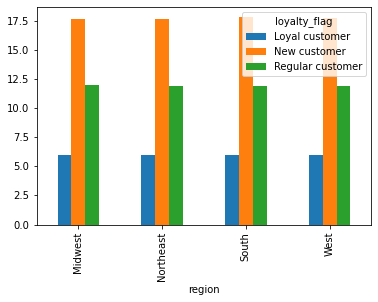

In [102]:
stackbar_5 = df_7.plot(kind='bar', stacked=False)

In [103]:
stackbar_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_region_stackedbar.png'))

In [112]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,slowest/busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_freq,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range Product,Regularly busy,Regular Busy,Average Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,-1.0,4,0,both,High-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Low Activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,Mid-range Product,Regularly busy,Regular Busy,Most Orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High Activity
